Taller Evaluativo : Analisis Probabilistico

Sofia Puerta Lopez
Juan David Camacho 
Mateo Largo

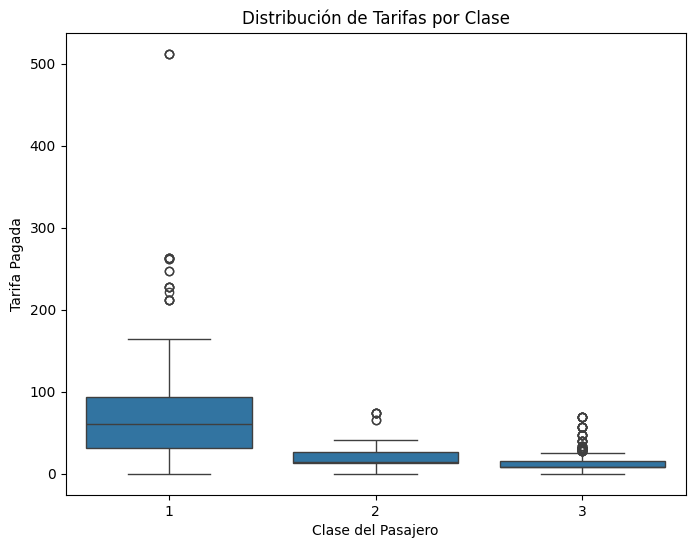

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

df = sns.load_dataset("titanic")
# Punto 1: Resumen Estadístico
# 1.1 Relación entre pclass y fare
plt.figure(figsize=(8, 6))
sns.boxplot(x="pclass", y="fare", data=df)
plt.title("Distribución de Tarifas por Clase")
plt.xlabel("Clase del Pasajero")
plt.ylabel("Tarifa Pagada")
plt.show()

Se encontraron datos atípicos, los valores más altos de tarifa en la Clase 1 tienen varios outliers, incluso algunos por encima de 500. También se ven algunos en las Clases 2 y 3 en menor cantidad. Estos valores indican que algunos pasajeros pagaron tarifas muy superiores al promedio.

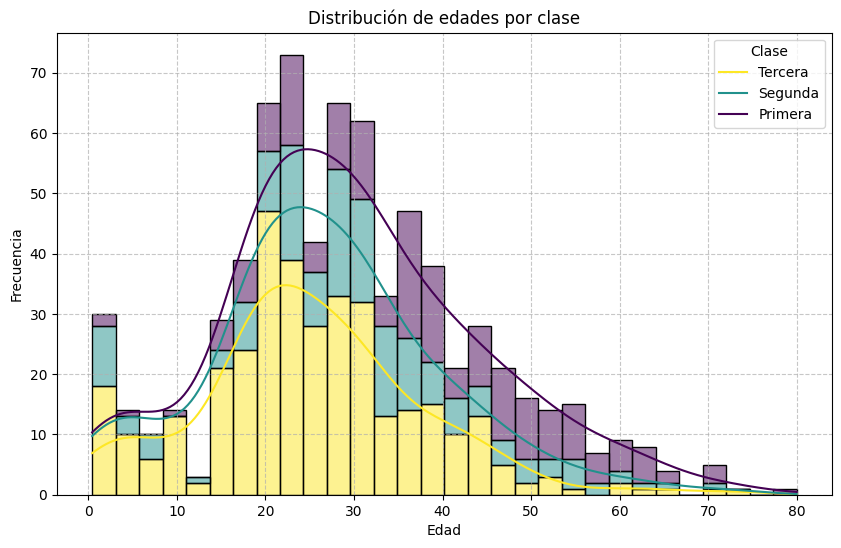

In [ ]:
# Punto 1.2 : Histograma de edades agrupadas por clase
plt.figure(figsize=(10, 6))
sns.histplot(df, x='age', hue='pclass', multiple='stack', bins=30, kde=True, palette='viridis', hue_order=[1, 2, 3])
plt.title('Distribución de edades por clase')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(title='Clase', labels=['Tercera', 'Segunda', 'Primera'])
plt.show()

La distribución de edades por clase en el Titanic muestra varios datos interesantes:
- **La Tercera clase:** tiene la mayoría de los pasajeros jóvenes (0-10 años) y en edad adulta temprana (20-30 años).
- **Segunda clase:** tiene un grupo importante en los 20-40 años, aunque con menor cantidad su distribución es más uniforme, sin grandes picos.
- **Primera clase:** Se observa una mayor proporción de pasajeros en la edad de (40-60 años) en comparación con las otras clases, Hay pocos niños en esta categoría.

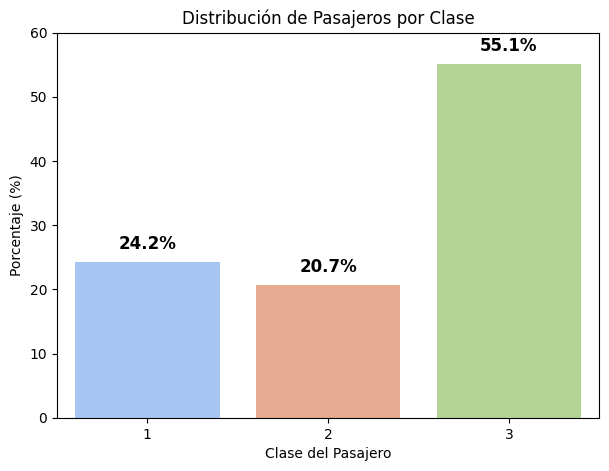

In [ ]:
# Punto 1.3 : Grafica al menos una de las variables categóricas. 
class_counts = df['pclass'].value_counts(normalize=True).sort_index() * 100  

plt.figure(figsize=(7,5))
ax = sns.barplot(x=class_counts.index, y=class_counts.values, hue=class_counts.index, 
                 palette=["#99c2ff", "#f4a582", "#b2df8a"], legend=False)


for i, val in enumerate(class_counts.values):
    plt.text(i, val + 2, f"{val:.1f}%", ha='center', fontsize=12, fontweight='bold')

plt.xlabel("Clase del Pasajero")
plt.ylabel("Porcentaje (%)")
plt.title("Distribución de Pasajeros por Clase")
plt.ylim(0, 60) 
plt.show()


La tercera clase tiene el mayor porcentaje de pasajeros
La segunda clase tiene el menor número de pasajeros
La primera clase se encuentra en un punto intermedio
**Implicaciones**
Esto sugiere que la mayoría de los pasajeros pertenecían a bajas clases económicas en la cual los boletos de tercera clase eran más accesibles.

In [7]:
# Punto 2: Probabilidad de Supervivencia por Edad
menores_18 = df[df["age"] < 18]
probabilidad_menores_18 = len(menores_18[menores_18["survived"] == 1]) / len(menores_18)
print(f"Probabilidad de supervivencia para menores de 18 años: {probabilidad_menores_18:.2%}")

Probabilidad de supervivencia para menores de 18 años: 53.98%


Probabilidad de supervivencia para menores de 18 años: 53.98%

In [8]:
# Punto 3.1: Probabilidad de ser de segunda clase o haber sobrevivido
p_class2 = len(df[df["pclass"] == 2]) / len(df)
p_survived = len(df[df["survived"] == 1]) / len(df)
p_class2_survived = len(df[(df["pclass"] == 2) & (df["survived"] == 1)]) / len(df)

p_union = p_class2 + p_survived - p_class2_survived
print(f"Probabilidad de ser de segunda clase o haber sobrevivido: {p_union:.2%}")

# Punto 3.2: Probabilidad de ser hombre y haber fallecido
p_male = len(df[df["sex"] == "male"]) / len(df)
p_male_death = len(df[(df["sex"] == "male") & (df["survived"] == 0)]) / len(df)

print(f"Probabilidad de ser hombre y haber fallecido: {p_male_death:.2%}")

Probabilidad de ser de segunda clase o haber sobrevivido: 49.27%
Probabilidad de ser hombre y haber fallecido: 52.53%


Probabilidad de ser de segunda clase o haber sobrevivido: 49.27%
Probabilidad de ser hombre y haber fallecido: 52.53%

In [9]:
# Punto 4: Probabilidad de haber pagado más de 200 dado que sobrevivió
sobrevivientes = df[df["survived"] == 1]
p_fare_200_given_survived = len(sobrevivientes[sobrevivientes["fare"] > 200]) / len(sobrevivientes)

print(f"Probabilidad de haber pagado más de 200 dado que sobrevivió: {p_fare_200_given_survived:.2%}")

Probabilidad de haber pagado más de 200 dado que sobrevivió: 4.09%


Probabilidad de haber pagado más de 200 dado que sobrevivió: 4.09%

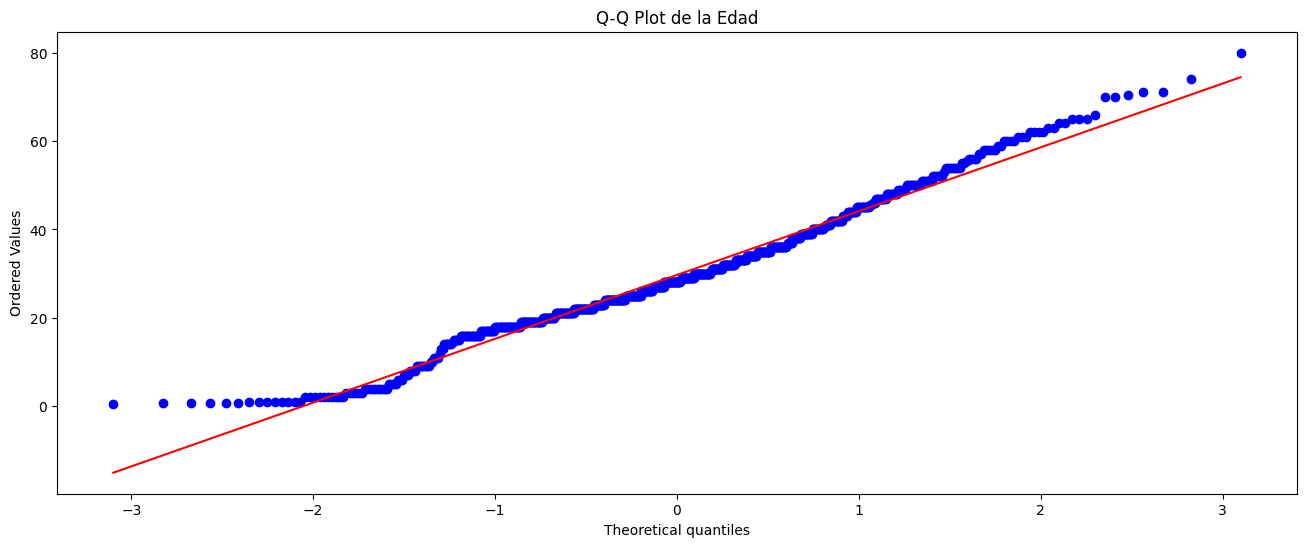

Estadístico de prueba: 0.9815.
p-valor: 0.0000000734
Probabilidad de que un pasajero tenga entre 20 y 40 años: 44.89%


In [14]:
# Punto 5: Distribución
#1. ¿Hay normal? 
# Grafico de Q-Q plot
plt.figure(figsize=(16, 6))
stats.probplot(df['age'].dropna(), dist="norm", plot=plt)
plt.title("Q-Q Plot de la Edad")
plt.show()

# Prueba de Shapiro-Wilk
stat, p_value = stats.shapiro(df['age'].dropna())
print(f"Estadístico de prueba: {stat:.4}.\np-valor: {p_value:.10f}")

# ¿Cuál es la probabilidad de que un pasajero seleccionado al azar tenga entre 20 y 40 años?
n_edad_20_40 = len(df[(df['age'] >= 20) & (df['age'] <= 40)])

probabilidad = n_edad_20_40 / len(df)
print(f"Probabilidad de que un pasajero tenga entre 20 y 40 años: {probabilidad:.2%}")

**Conclucion:**
La prueba de Shapiro-Wilk indica que los datos de las edades NO siguen una distribución normal, con un p-valor extremadamente bajo, al observar el gráfico Q-Q plot podemos ver que los datos se ajustan relativamente bien a una línea recta.  Por lo cual, Aunque NO hay normalidad, visualmente los datos parecen estar cerca de una distribución normal.

El estadístico de prueba obtenido fue 0.9814, un valor muy cercano a 1, lo cual indica que los datos estan cerca de una distribución normal. Sin embargo, la prueba estadística sugiere que la hipótesis de normalidad debe ser rechazada debido al bajo valor del p-valor que es 0.0000000734.

Además la probabilidad de que un pasajero tenga entre 20 y 40 años es del 44.89%, lo que indica que casi la mitad de los pasajeros se encuentran en este rango de edad.

### Punto 6: Pregunta Abierta
**1. ¿Cómo usarías estos cálculos para prever el éxito de campañas de marketing?**
Se podrian usar estos calculos para prever exito en campañas de marketing aplicando modelos estadisticos para identificar patrones en el comportamiento de los clientes. Me centraría en diseñar la campaña de marketing al estudiar variables mas importantes como la edad, género y poder adquisitivo. Esto permitiría dirigir la campaña hacia los productos o servicios más atractivos para cada grupo, ajustar los precios según las capacidades de gasto de los diferentes clases economicas y mejorar los canales de marketing más efectivos para cada tipo de cliente, maximizando así el impacto y el retorno de inversión. Con todos esto se podria estimar que grupos tienen mayor afinidad por ciertos productos o servicios y asi prever el exito en campañas de marketing.